In [ ]:
import os

In [ ]:
path =  '../input/plant-leaves-colour/Plant_leave_diseases_dataset_with_augmentation/'

In [ ]:
labels =os.listdir(path)

In [ ]:
labels

['Corn___Northern_Leaf_Blight',
 'Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Background_without_leaves',
 'Potato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn___healthy',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Corn___Common_rust',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy',
 'Tomato___Leaf_Mold',
 'Cher

In [ ]:
d = {}
for x in labels :
    d[x] = len(os.listdir(path+"//"+x))

In [ ]:
len(d)

39

In [ ]:
d

{'Corn___Northern_Leaf_Blight': 1000,
 'Tomato___Late_blight': 1909,
 'Tomato___healthy': 1591,
 'Grape___healthy': 1000,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Soybean___healthy': 5090,
 'Squash___Powdery_mildew': 1835,
 'Background_without_leaves': 1143,
 'Potato___healthy': 1000,
 'Tomato___Early_blight': 1000,
 'Tomato___Septoria_leaf_spot': 1771,
 'Corn___healthy': 1162,
 'Strawberry___Leaf_scorch': 1109,
 'Peach___healthy': 1000,
 'Apple___Apple_scab': 1000,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357,
 'Tomato___Bacterial_spot': 2127,
 'Apple___Black_rot': 1000,
 'Blueberry___healthy': 1502,
 'Cherry___Powdery_mildew': 1052,
 'Peach___Bacterial_spot': 2297,
 'Apple___Cedar_apple_rust': 1000,
 'Tomato___Target_Spot': 1404,
 'Pepper,_bell___healthy': 1478,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Potato___Late_blight': 1000,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 1000,
 'Tomato___Tomato_mosaic_virus': 1000,
 'Strawberry___healthy': 1000,
 'C

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import random
import os
import matplotlib.pyplot as plt


In [ ]:

filenames = os.listdir("../input/plant-leaves-colour/Plant_leave_diseases_dataset_with_augmentation")


In [ ]:
leaf_files = []
lef_categories = []

In [ ]:
for filename in filenames:
    
    filepath  = "../input/plant-leaves-colour/Plant_leave_diseases_dataset_with_augmentation//" + filename
    
    for x in os.listdir(file):
        p = filepath +"//"+ x
        leaf_files.append(p)
        leaf_categories.append(filename)
#         print(filename,p)
    
df = pd.DataFrame({
    'filename': leaf_files,
    'category': leaf_categories
})

In [ ]:
df.head()

,filename,category
0,../input/plant-leaves-colour/Plant_leave_disea...,Corn___Northern_Leaf_Blight
1,../input/plant-leaves-colour/Plant_leave_disea...,Corn___Northern_Leaf_Blight
2,../input/plant-leaves-colour/Plant_leave_disea...,Corn___Northern_Leaf_Blight
3,../input/plant-leaves-colour/Plant_leave_disea...,Corn___Northern_Leaf_Blight
4,../input/plant-leaves-colour/Plant_leave_disea...,Corn___Northern_Leaf_Blight


In [ ]:
IMAGE_SIZE = (224,224)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model,Sequential, Input
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, MaxPool2D, Dropout, Conv2D, AveragePooling2D, GlobalAveragePooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNet

mob = MobileNet(weights='imagenet', include_top=False)

inx = Input(shape=(224, 224, 3))

inz = mob(inx)
inz = GlobalAveragePooling2D()(inz)
inz = BatchNormalization()(inz)
inz = Dropout(0.5)(inz)
inz = Dense(256, activation='relu')(inz)
inz = BatchNormalization()(inz)
inz = Dropout(0.5)(inz)

    # multi output
output = Dense(39,activation = 'softmax', name='root')(inz)
 
model = Model(inx,output)
    
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()
    

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
______________________________________________________________

In [ ]:
redz = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
check_point1 = ModelCheckpoint('model_2.h5', verbose=1, save_best_only=True)

<AxesSubplot:>

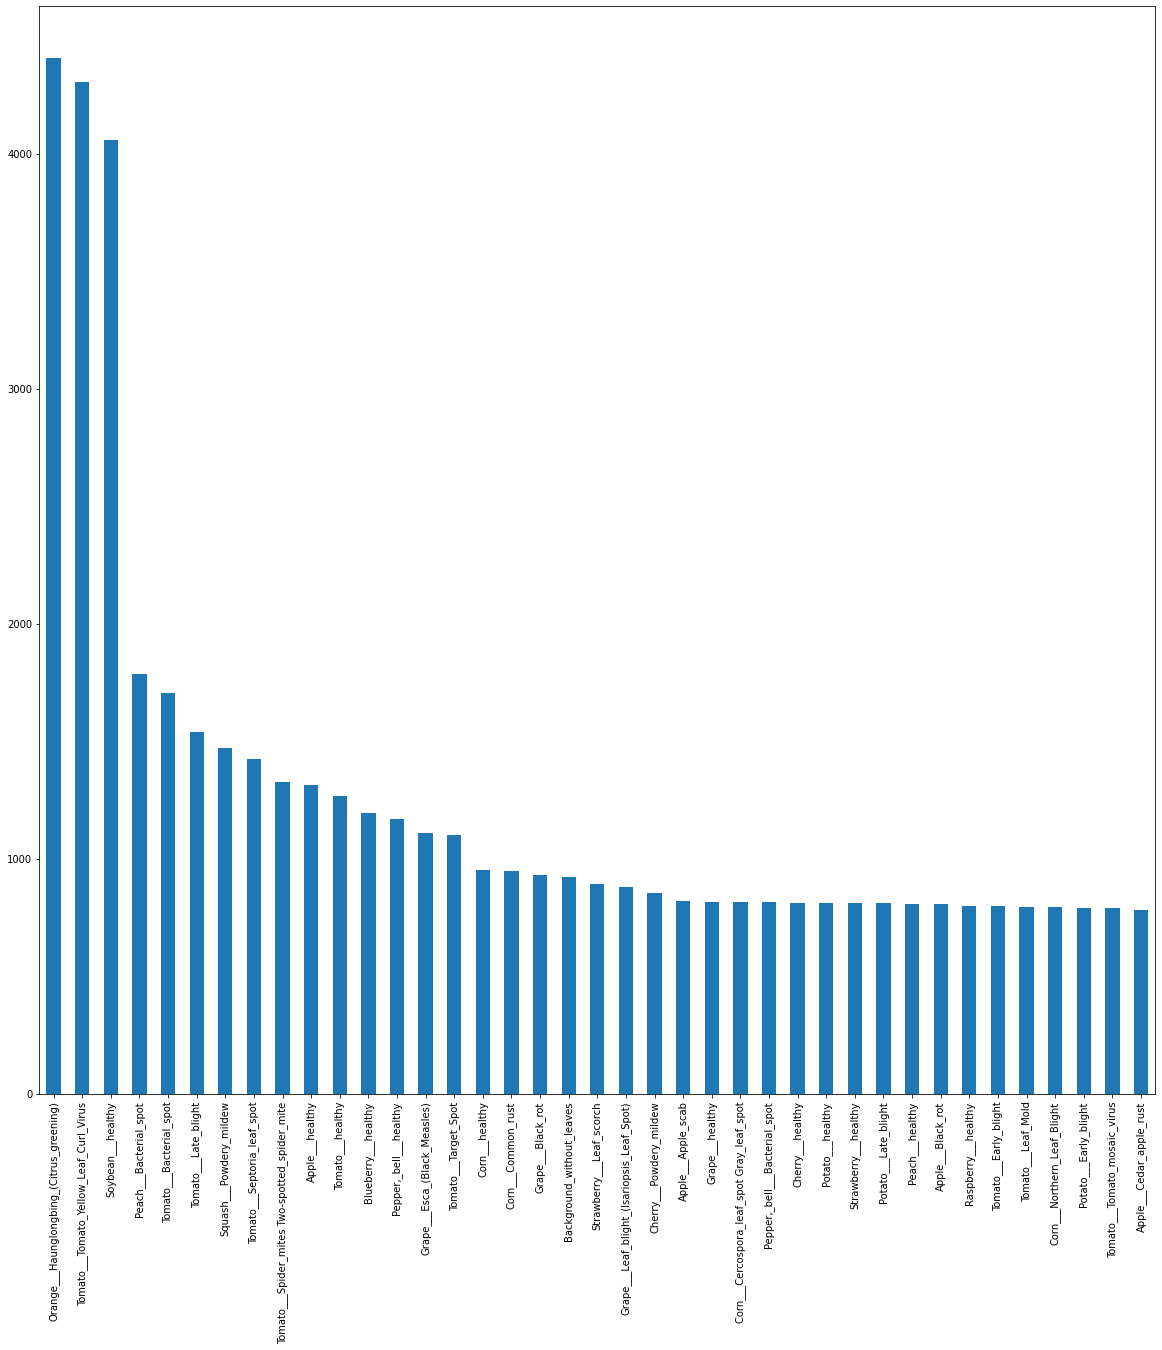

In [ ]:
train_z, validate_z = train_test_split(df, test_size=0.20, random_state=42)
train_z= train_z.reset_index(drop=True)
validate_z = validate_z.reset_index(drop=True)
train_z.head()
plt.figure(figsize = (20,20))
train_z['category'].value_counts().plot.bar()

In [ ]:
total_train = train_z.shape[0]
total_validation = validate_z.shape[0]
batch_size = 64

In [ ]:
t_datagenerator = ImageDataGenerator(
    
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    validation_split=0.2,
    height_shift_range=0.1
)

t_generator = t_datagenerator.flow_from_dataframe(
    train_z, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 49188 validated image filenames belonging to 39 classes.


In [ ]:
v_datagenerator = ImageDataGenerator(rescale=1/255)

v_generator = v_datagenerator.flow_from_dataframe(
    validate_z, 
    
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
   
)

Found 12298 validated image filenames belonging to 39 classes.


In [ ]:
t_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Background_without_leaves': 4,
 'Blueberry___healthy': 5,
 'Cherry___Powdery_mildew': 6,
 'Cherry___healthy': 7,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8,
 'Corn___Common_rust': 9,
 'Corn___Northern_Leaf_Blight': 10,
 'Corn___healthy': 11,
 'Grape___Black_rot': 12,
 'Grape___Esca_(Black_Measles)': 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
 'Grape___healthy': 15,
 'Orange___Haunglongbing_(Citrus_greening)': 16,
 'Peach___Bacterial_spot': 17,
 'Peach___healthy': 18,
 'Pepper,_bell___Bacterial_spot': 19,
 'Pepper,_bell___healthy': 20,
 'Potato___Early_blight': 21,
 'Potato___Late_blight': 22,
 'Potato___healthy': 23,
 'Raspberry___healthy': 24,
 'Soybean___healthy': 25,
 'Squash___Powdery_mildew': 26,
 'Strawberry___Leaf_scorch': 27,
 'Strawberry___healthy': 28,
 'Tomato___Bacterial_spot': 29,
 'Tomato___Early_blight': 30,
 'Tomato___Late_blight': 31,
 'Tomato__

In [ ]:
epochs=25


modelhistory = model.fit_generator(
    t_generator, 
    epochs=epochs,
    validation_data=v_generator,
    validation_stps=total_validation//batch_size,
    steps_per_epoch=total_train//batch_size,callbacks=[redz, check_point1])
    


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
768/768 [==============================] - 855s 1s/step - loss: 2.3419 - accuracy: 0.4607 - val_loss: 0.1701 - val_accuracy: 0.9509

Epoch 00001: val_loss improved from inf to 0.17014, saving model to model_2.h5
Epoch 2/25
768/768 [==============================] - 766s 997ms/step - loss: 0.2633 - accuracy: 0.9223 - val_loss: 0.0752 - val_accuracy: 0.9768

Epoch 00002: val_loss improved from 0.17014 to 0.07524, saving model to model_2.h5
Epoch 3/25
768/768 [==============================] - 767s 999ms/step - loss: 0.1411 - accuracy: 0.9583 - val_loss: 0.0418 - val_accuracy: 0.9870

Epoch 00003: val_loss improved from 0.07524 to 0.04185, saving model to model_2.h5
Epoch 4/25
768/768 [==============================] - 747s 972ms/step - loss: 0.0896 - accuracy: 0.9749 - val_loss: 0.0359 - val_accuracy: 0.9889

Epoch 00004: val_loss improved from 0.04185 to 0.03592, saving model to model_2.h5
Epoch 5/25
768/768 [==============================] - 753s 981ms/step - loss: 0.0666 - 

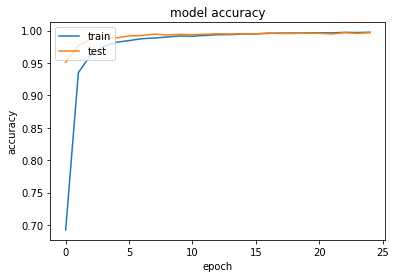

In [ ]:
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

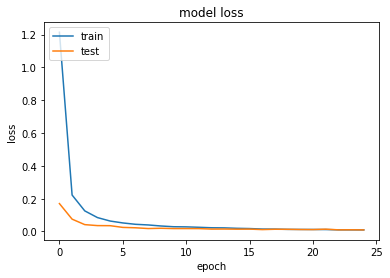

In [ ]:
# loss plot
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("plant(w).h5")
model.save("plant(m).h5")

In [ ]:
d = t_generator.class_indices

import cv2
from tqdm import tqdm
from skimage.transform import resize
pred = []
y_true = []
for f in tqdm(range(len(validate_z))) :
#     print(validate["filename"][f])
    x = cv2.imread(validate_z["filename"][f], cv2.IMREAD_COLOR)
    
        
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
#     print(type(x))
#     print(x.shape)
    x = resize(x, IMAGE_SIZE)
#     print(x.shape)
#     print(x)

    x = x.astype(np.float32)
#     print("aaa",x)
#     print(x.shape)
    x = x.reshape((1,224,224,3))

    pred.append(np.argmax(model.predict([x])[0]))
#     print(d[validate["category"][f]])
    y_true.append(d[validate_z["category"][f]])
    

labels = list(t_generator.class_indices.keys())

 82%|████████▏ | 10043/12298 [14:25<03:16, 11.45it/s]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(20,20))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
